<a href="https://colab.research.google.com/github/HannesKock/RaceTeam2_CHP/blob/main/Pfadberechnungen270625V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

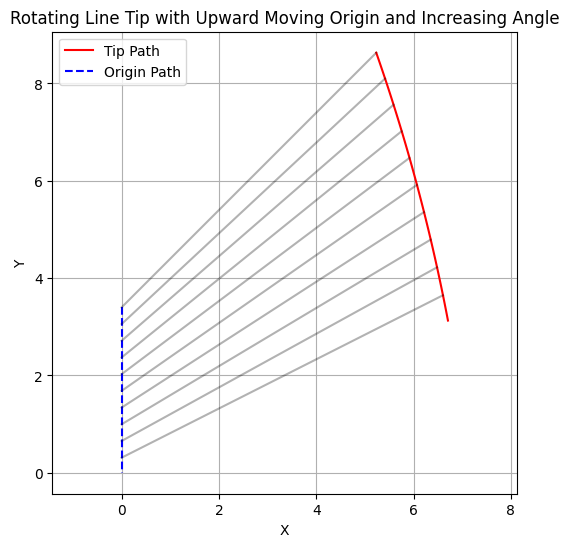

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
length = 7.4
total_angle_deg = 25
n_steps = 100

# Angle increases linearly from 0 to total_angle_deg
angle_degs = np.linspace(45, total_angle_deg, n_steps)
angle_rads = np.deg2rad(angle_degs)

# Origin moves linearly up along y-axis
origin_ys = np.linspace(3.4, 0, n_steps)
origin_xs = np.zeros(n_steps)

# Calculate tip positions
tip_xs = origin_xs + length * np.cos(angle_rads)
tip_ys = origin_ys + length * np.sin(angle_rads)

# Plotting
plt.figure(figsize=(6, 6))
plt.plot(tip_xs, tip_ys, 'r-', label='Tip Path')
plt.plot(origin_xs, origin_ys, 'b--', label='Origin Path')

# Draw sample lines at every 10th step
for i in range(0, n_steps, 10):
    ox, oy = origin_xs[i], origin_ys[i]
    tx, ty = tip_xs[i], tip_ys[i]
    plt.plot([ox, tx], [oy, ty], 'k-', alpha=0.3)

# Labels and display
plt.title("Rotating Line Tip with Upward Moving Origin and Increasing Angle")
plt.xlabel("X")
plt.ylabel("Y")
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()


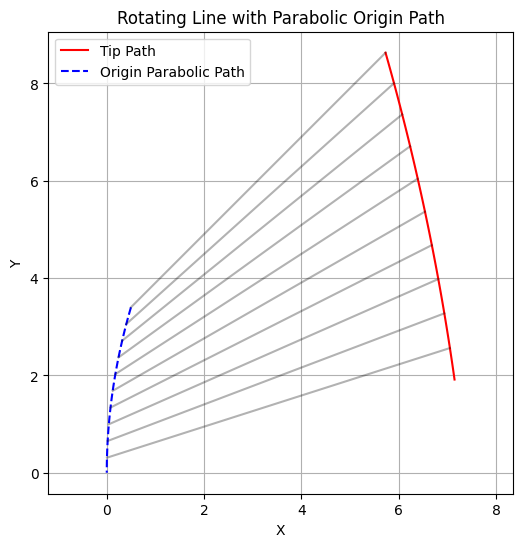

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
length = 7.4
total_angle_deg = 15
n_steps = 100
a = 0.043  # Parabola strength (adjust to control curvature)

# Step-wise increase in angle and vertical position
angle_degs = np.linspace(45, total_angle_deg, n_steps)
angle_rads = np.deg2rad(angle_degs)
origin_ys = np.linspace(3.4, 0, n_steps)
origin_xs = a * origin_ys**2  # Parabolic horizontal motion

# Compute tip positions
tip_xs = origin_xs + length * np.cos(angle_rads)
tip_ys = origin_ys + length * np.sin(angle_rads)

# Plotting
plt.figure(figsize=(6, 6))
plt.plot(tip_xs, tip_ys, 'r-', label='Tip Path')
plt.plot(origin_xs, origin_ys, 'b--', label='Origin Parabolic Path')

# Sample lines
for i in range(0, n_steps, 10):
    ox, oy = origin_xs[i], origin_ys[i]
    tx, ty = tip_xs[i], tip_ys[i]
    plt.plot([ox, tx], [oy, ty], 'k-', alpha=0.3)

# Plot settings
plt.title("Rotating Line with Parabolic Origin Path")
plt.xlabel("X")
plt.ylabel("Y")
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()


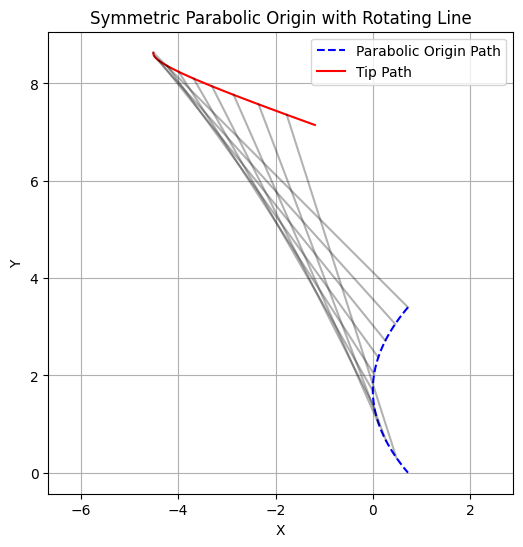

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
length = 7.4
total_angle_deg = 105
n_steps = 100
a = 0.25  # Controls how curved the origin path is

# Vertical movement
origin_ys = np.linspace(3.4, 0, n_steps)
y_mid = (origin_ys[0] + origin_ys[-1]) / 2

# Symmetric parabola centered at y_mid
origin_xs = a * (origin_ys - y_mid)**2

# Rotation angles from 0° to 60°
angle_degs = np.linspace(135, total_angle_deg, n_steps)
angle_rads = np.deg2rad(angle_degs)

# Tip coordinates
tip_xs = origin_xs + length * np.cos(angle_rads)
tip_ys = origin_ys + length * np.sin(angle_rads)

# Plotting
plt.figure(figsize=(6, 6))
plt.plot(origin_xs, origin_ys, 'b--', label='Parabolic Origin Path')
plt.plot(tip_xs, tip_ys, 'r-', label='Tip Path')

# Draw sample lines from origin to tip
for i in range(0, n_steps, 10):
    plt.plot([origin_xs[i], tip_xs[i]], [origin_ys[i], tip_ys[i]], 'k-', alpha=0.3)

# Labels and plot formatting
plt.title("Symmetric Parabolic Origin with Rotating Line")
plt.xlabel("X")
plt.ylabel("Y")
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()


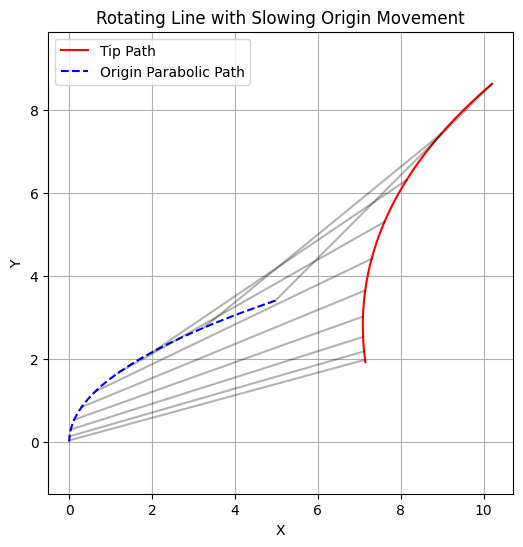

In [4]:

import numpy as np
import matplotlib.pyplot as plt

# Parameters
length = 7.4
total_angle_deg = 15
n_steps = 100
a = 0.043  # Parabola strength (adjust to control curvature)

# Define easing function (quadratic ease out)
def ease_out_quad(t):
    return 1 - (1 - t)**2

# Create normalized progress array
t = np.linspace(0, 1, n_steps)

# Apply easing to progress
eased_t = ease_out_quad(t)

# Generate angle and origin_y arrays with easing effect
angle_degs = np.interp(eased_t, [0, 1], [45, total_angle_deg])
origin_ys = np.interp(eased_t, [0, 1], [3.4, 0])

angle_rads = np.deg2rad(angle_degs)
origin_xs = a * origin_ys**2  # Parabolic horizontal motion

# Compute tip positions
tip_xs = origin_xs + length * np.cos(angle_rads)
tip_ys = origin_ys + length * np.sin(angle_rads)

# Plotting
plt.figure(figsize=(6, 6))
plt.plot(tip_xs, tip_ys, color='red', label='Tip Path')
plt.plot(origin_xs, origin_ys, color='blue', linestyle='--', label='Origin Parabolic Path')

# Sample lines
for i in range(0, n_steps, 10):
    ox, oy = origin_xs[i], origin_ys[i]
    tx, ty = tip_xs[i], tip_ys[i]
    plt.plot([ox, tx], [oy, ty], color='black', alpha=0.3)

# Plot settings
plt.title("Rotating Line with Slowing Origin Movement")
plt.xlabel("X")
plt.ylabel("Y")
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()

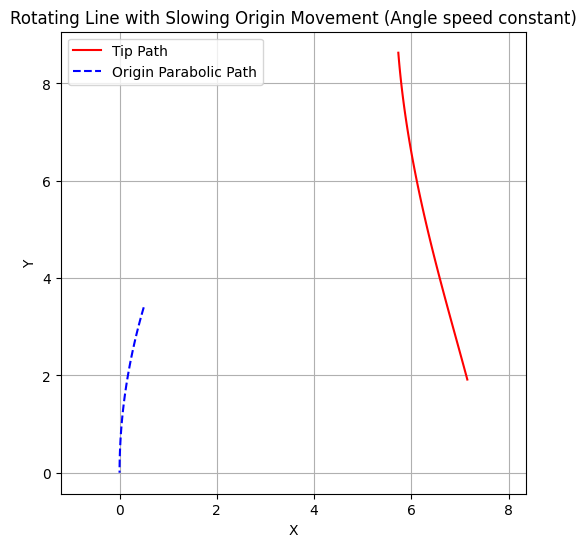

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
length = 7.4
start_angle_deg = 45
end_angle_deg = 15
n_steps = 100
a = 0.043  # Parabola strength (adjust to control curvature)

# Keep angular movement uniform
angle_degs = np.linspace(start_angle_deg, end_angle_deg, n_steps)
angle_rads = np.deg2rad(angle_degs)

# Create a linear progress variable for y, then apply easing for slowdown
progress = np.linspace(0, 1, n_steps)

# Easing function for origin_y (slows down at the end)
def ease_out_quad(t):
    return 1 - (1 - t) ** 2

eased_progress = ease_out_quad(progress)
# Map eased progress to origin_y from starting point (3) to 0
origin_ys = np.interp(eased_progress, [0,1], [3.4, 0])

# Calculate origin_xs based on parabola
origin_xs = a * origin_ys ** 2

# Compute tip positions
tip_xs = origin_xs + length * np.cos(angle_rads)
tip_ys = origin_ys + length * np.sin(angle_rads)

# Plotting
plt.figure(figsize=(6, 6))
plt.plot(tip_xs, tip_ys, 'r-', label='Tip Path')
plt.plot(origin_xs, origin_ys, 'b--', label='Origin Parabolic Path')

'''
# Sample lines
for i in range(0, n_steps, 10):
    ox, oy = origin_xs[i], origin_ys[i]
    tx, ty = tip_xs[i], tip_ys[i]
    plt.plot([ox, tx], [oy, ty], 'k-', alpha=0.3)
'''

# Plot settings
plt.title("Rotating Line with Slowing Origin Movement (Angle speed constant)")
plt.xlabel("X")
plt.ylabel("Y")
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()

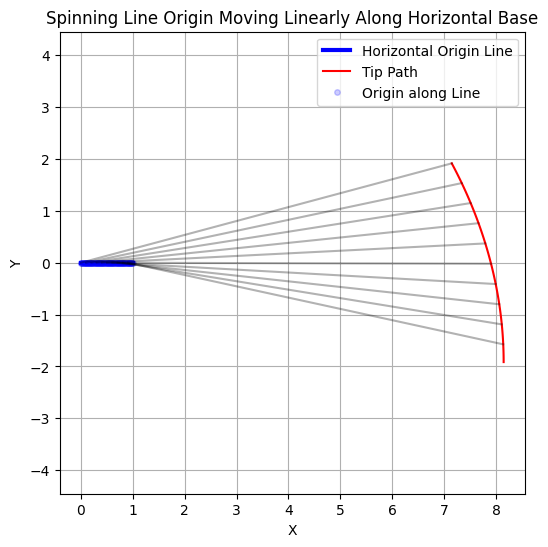

In [88]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
length = 7.4
start_angle_deg = 15
end_angle_deg = -15
n_steps = 100
a = 0.043  # Parabola strength (not used now)
horizontal_length = 1.0  # Length of the new horizontal bar

# Keep angular movement uniform
angle_degs = np.linspace(start_angle_deg, end_angle_deg, n_steps)
angle_rads = np.deg2rad(angle_degs)

progress = np.linspace(0, 1, n_steps)  # Linear progress (no easing)

# Define the fixed base of the horizontal bar (formerly start of parabola)
origin_base_x = 0  # 0.498932
origin_base_y = 0

# Horizontal line
horizontal_xs = [origin_base_x, origin_base_x + horizontal_length]
horizontal_ys = [origin_base_y, origin_base_y]

# The origin of the rotating line moves linearly along this horizontal bar
moving_origin_xs = np.linspace(origin_base_x, origin_base_x + horizontal_length, n_steps)
moving_origin_ys = np.full_like(moving_origin_xs, origin_base_y)

# Compute tip of rotating line (relative to moving base)
tip_xs = moving_origin_xs + length * np.cos(angle_rads)
tip_ys = moving_origin_ys + length * np.sin(angle_rads)

# Plotting
plt.figure(figsize=(6, 6))
plt.plot(horizontal_xs, horizontal_ys, 'b-', linewidth=3, label='Horizontal Origin Line')
plt.plot(tip_xs, tip_ys, 'r-', label='Tip Path')
plt.plot(moving_origin_xs, moving_origin_ys, 'bo', alpha=0.2, markersize=4, label='Origin along Line')

# Sample lines
for i in range(0, n_steps, 10):
    ox, oy = moving_origin_xs[i], moving_origin_ys[i]
    tx, ty = tip_xs[i], tip_ys[i]
    plt.plot([ox, tx], [oy, ty], 'k-', alpha=0.3)

# Plot settings
plt.title("Spinning Line Origin Moving Linearly Along Horizontal Base")
plt.xlabel("X")
plt.ylabel("Y")
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()

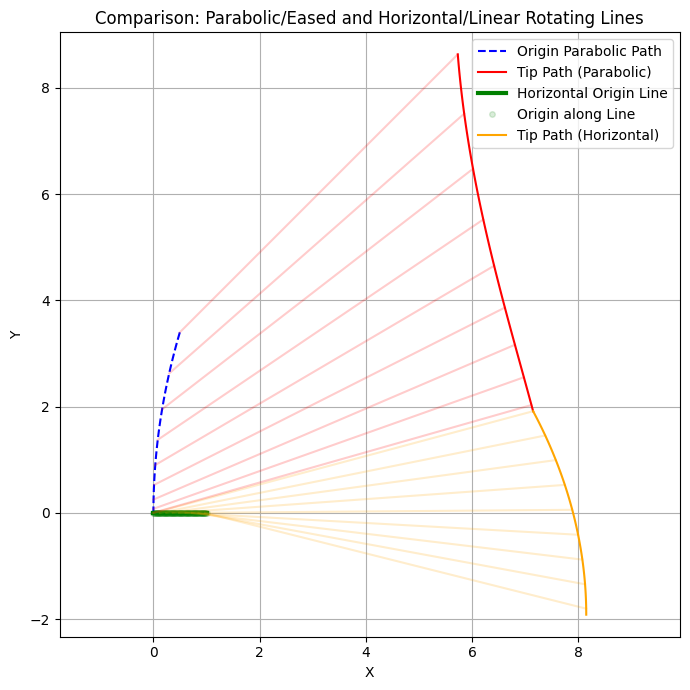

In [90]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for both
length = 7.4
n_steps = 100

# ===== Parabolic/Easing Path Sweep =====
parab_start_angle = 45
parab_end_angle = 15
a = 0.043  # Parabola strength

parab_angle_degs = np.linspace(parab_start_angle, parab_end_angle, n_steps)
parab_angle_rads = np.deg2rad(parab_angle_degs)
progress = np.linspace(0, 1, n_steps)

def ease_out_quad(t):
    return 1 - (1 - t) ** 2

eased_progress = ease_out_quad(progress)
origin_ys = np.interp(eased_progress, [0, 1], [3.4, 0])
origin_xs = a * origin_ys ** 2

tip_xs_parab = origin_xs + length * np.cos(parab_angle_rads)
tip_ys_parab = origin_ys + length * np.sin(parab_angle_rads)

# ===== Horizontal/Linear Path Sweep =====
hor_start_angle = 15
hor_end_angle = -15
horizontal_length = 1.0

hor_angle_degs = np.linspace(hor_start_angle, hor_end_angle, n_steps)
hor_angle_rads = np.deg2rad(hor_angle_degs)
origin_base_x = 0
origin_base_y = 0

horizontal_xs = [origin_base_x, origin_base_x + horizontal_length]
horizontal_ys = [origin_base_y, origin_base_y]

moving_origin_xs = np.linspace(origin_base_x, origin_base_x + horizontal_length, n_steps)
moving_origin_ys = np.full_like(moving_origin_xs, origin_base_y)

tip_xs_hor = moving_origin_xs + length * np.cos(hor_angle_rads)
tip_ys_hor = moving_origin_ys + length * np.sin(hor_angle_rads)

# ===== Plotting =====
plt.figure(figsize=(7, 7))

# Parabolic path
plt.plot(origin_xs, origin_ys, 'b--', label='Origin Parabolic Path')
plt.plot(tip_xs_parab, tip_ys_parab, 'r-', label='Tip Path (Parabolic)')

# Horizontal movement path
plt.plot(horizontal_xs, horizontal_ys, 'g-', linewidth=3, label='Horizontal Origin Line')
plt.plot(moving_origin_xs, moving_origin_ys, 'go', alpha=0.15, markersize=4, label='Origin along Line')
plt.plot(tip_xs_hor, tip_ys_hor, 'orange', label='Tip Path (Horizontal)')

# Sample sweep lines for both
for i in range(0, n_steps, 12):
    ox, oy = origin_xs[i], origin_ys[i]
    tx, ty = tip_xs_parab[i], tip_ys_parab[i]
    plt.plot([ox, tx], [oy, ty], 'r-', alpha=0.2)

    ox, oy = moving_origin_xs[i], moving_origin_ys[i]
    tx, ty = tip_xs_hor[i], tip_ys_hor[i]
    plt.plot([ox, tx], [oy, ty], 'orange', alpha=0.2)

# Plot settings
plt.title("Comparison: Parabolic/Eased and Horizontal/Linear Rotating Lines")
plt.xlabel("X")
plt.ylabel("Y")
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

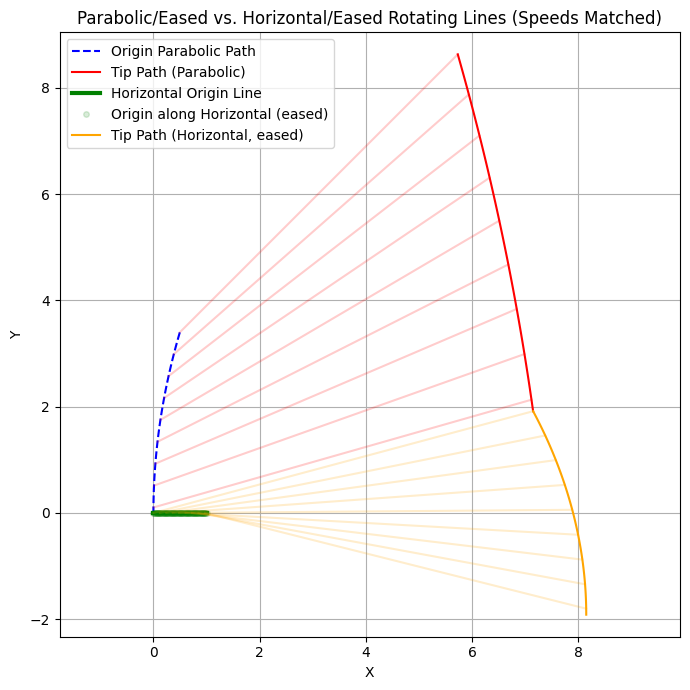

In [98]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for both
length = 7.4
n_steps = 100

# ===== Parabolic/Easing Path Sweep =====
parab_start_angle = 45
parab_end_angle = 15
a = 0.043  # Parabola strength

parab_angle_degs = np.linspace(parab_start_angle, parab_end_angle, n_steps)
parab_angle_rads = np.deg2rad(parab_angle_degs)
progress = np.linspace(0, 1, n_steps)

def ease_out_quad(t):
    return 1*t # - (1 - t) ** 2

eased_progress = ease_out_quad(progress)
origin_ys = np.interp(eased_progress, [0, 1], [3.4, 0])
origin_xs = a * origin_ys ** 2

tip_xs_parab = origin_xs + length * np.cos(parab_angle_rads)
tip_ys_parab = origin_ys + length * np.sin(parab_angle_rads)

# ===== Horizontal/Eased Path Sweep =====
hor_start_angle = 15
hor_end_angle = -15
horizontal_length = 1.0

hor_angle_degs = np.linspace(hor_start_angle, hor_end_angle, n_steps)
hor_angle_rads = np.deg2rad(hor_angle_degs)
origin_base_x = 0
origin_base_y = 0

horizontal_xs = [origin_base_x, origin_base_x + horizontal_length]
horizontal_ys = [origin_base_y, origin_base_y]

# Apply easing to the horizontal motion!
moving_origin_xs = np.interp(eased_progress, [0, 1], [origin_base_x, origin_base_x + horizontal_length])
moving_origin_ys = np.full_like(moving_origin_xs, origin_base_y)

tip_xs_hor = moving_origin_xs + length * np.cos(hor_angle_rads)
tip_ys_hor = moving_origin_ys + length * np.sin(hor_angle_rads)

# ===== Plotting =====
plt.figure(figsize=(7, 7))

# Parabolic path
plt.plot(origin_xs, origin_ys, 'b--', label='Origin Parabolic Path')
plt.plot(tip_xs_parab, tip_ys_parab, 'r-', label='Tip Path (Parabolic)')

# Horizontal movement path (now with same easing as parabola)
plt.plot(horizontal_xs, horizontal_ys, 'g-', linewidth=3, label='Horizontal Origin Line')
plt.plot(moving_origin_xs, moving_origin_ys, 'go', alpha=0.15, markersize=4, label='Origin along Horizontal (eased)')
plt.plot(tip_xs_hor, tip_ys_hor, color='orange', label='Tip Path (Horizontal, eased)')

# Sample sweep lines for both
for i in range(0, n_steps, 12):
    ox, oy = origin_xs[i], origin_ys[i]
    tx, ty = tip_xs_parab[i], tip_ys_parab[i]
    plt.plot([ox, tx], [oy, ty], 'r-', alpha=0.2)
    ox, oy = moving_origin_xs[i], moving_origin_ys[i]
    tx, ty = tip_xs_hor[i], tip_ys_hor[i]
    plt.plot([ox, tx], [oy, ty], color='orange', alpha=0.2)

# Plot settings
plt.title("Parabolic/Eased vs. Horizontal/Eased Rotating Lines (Speeds Matched)")
plt.xlabel("X")
plt.ylabel("Y")
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

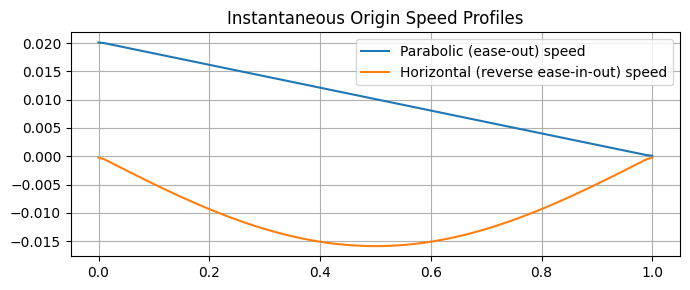

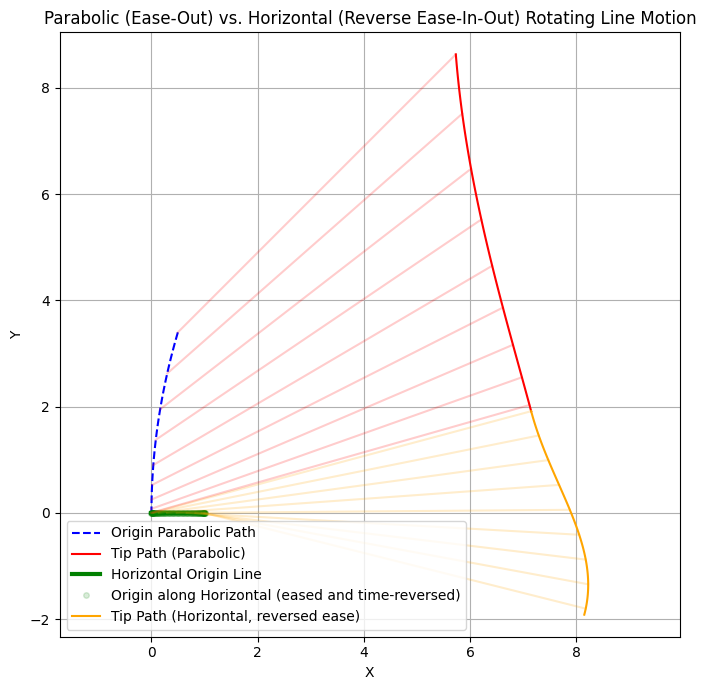

In [105]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
length = 7.4
n_steps = 100
a = 0.043  # Parabola strength
horizontal_length = 1.0

progress = np.linspace(0, 1, n_steps)

# Parabolic path: ease-out (slow at the end)
def ease_out_quad(t):
    return 1 - (1 - t) ** 2

eased_parab = ease_out_quad(progress)
origin_ys = np.interp(eased_parab, [0, 1], [3.4, 0])
origin_xs = a * origin_ys ** 2

start_angle_parab = 45
end_angle_parab = 15
angle_degs_parab = np.linspace(start_angle_parab, end_angle_parab, n_steps)
angle_rads_parab = np.deg2rad(angle_degs_parab)
tip_xs_parab = origin_xs + length * np.cos(angle_rads_parab)
tip_ys_parab = origin_ys + length * np.sin(angle_rads_parab)

# Horizontal path: custom ease-in-out, but flipped so it matches the desired speed profile
def ease_in_out_custom(t):
    # In-out speed: slow, fast, slow
    return 0.5*(1 - np.cos(np.pi * t)) # cosine-based smoothstep

# But we want the speed profile reversed.
def reverse_ease(t):
    return ease_in_out_custom(1 - t)

eased_hor = reverse_ease(progress)
origin_base_x = 0
origin_base_y = 0
moving_origin_xs = np.interp(eased_hor, [0, 1], [origin_base_x + horizontal_length, origin_base_x])
moving_origin_ys = np.full_like(moving_origin_xs, origin_base_y)

start_angle_hor = 15
end_angle_hor = -15
angle_degs_hor = np.linspace(start_angle_hor, end_angle_hor, n_steps)
angle_rads_hor = np.deg2rad(angle_degs_hor)
tip_xs_hor = moving_origin_xs + length * np.cos(angle_rads_hor)
tip_ys_hor = moving_origin_ys + length * np.sin(angle_rads_hor)

# (Optional) Show speed profiles for visual check
plt.figure(figsize=(7,3))
plt.plot(progress, np.gradient(eased_parab), label='Parabolic (ease-out) speed')
plt.plot(progress, np.gradient(eased_hor), label='Horizontal (reverse ease-in-out) speed')
plt.title('Instantaneous Origin Speed Profiles')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Plot both origin and tip paths and sweep lines
plt.figure(figsize=(7, 7))

# Show parabolic path
plt.plot(origin_xs, origin_ys, 'b--', label='Origin Parabolic Path')
plt.plot(tip_xs_parab, tip_ys_parab, 'r-', label='Tip Path (Parabolic)')

# Show horizontal path
plt.plot([origin_base_x, origin_base_x + horizontal_length], [origin_base_y, origin_base_y], 'g-', linewidth=3, label='Horizontal Origin Line')
plt.plot(moving_origin_xs, moving_origin_ys, 'go', alpha=0.15, markersize=4, label='Origin along Horizontal (eased and time-reversed)')
plt.plot(tip_xs_hor, tip_ys_hor, color='orange', label='Tip Path (Horizontal, reversed ease)')

# Sample lines
for i in range(0, n_steps, 12):
    ox, oy = origin_xs[i], origin_ys[i]
    tx, ty = tip_xs_parab[i], tip_ys_parab[i]
    plt.plot([ox, tx], [oy, ty], 'r-', alpha=0.2)
    ox, oy = moving_origin_xs[i], moving_origin_ys[i]
    tx, ty = tip_xs_hor[i], tip_ys_hor[i]
    plt.plot([ox, tx], [oy, ty], color='orange', alpha=0.2)

plt.title("Parabolic (Ease-Out) vs. Horizontal (Reverse Ease-In-Out) Rotating Line Motion")
plt.xlabel("X")
plt.ylabel("Y")
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

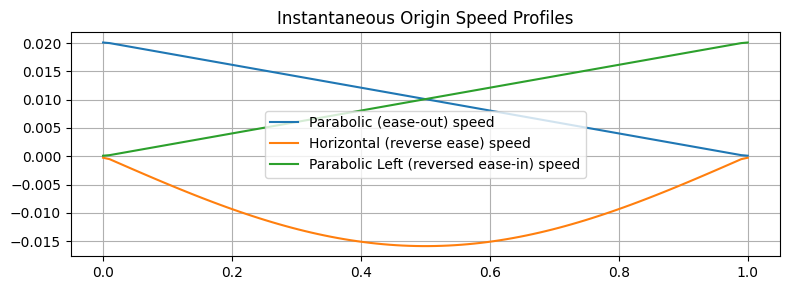

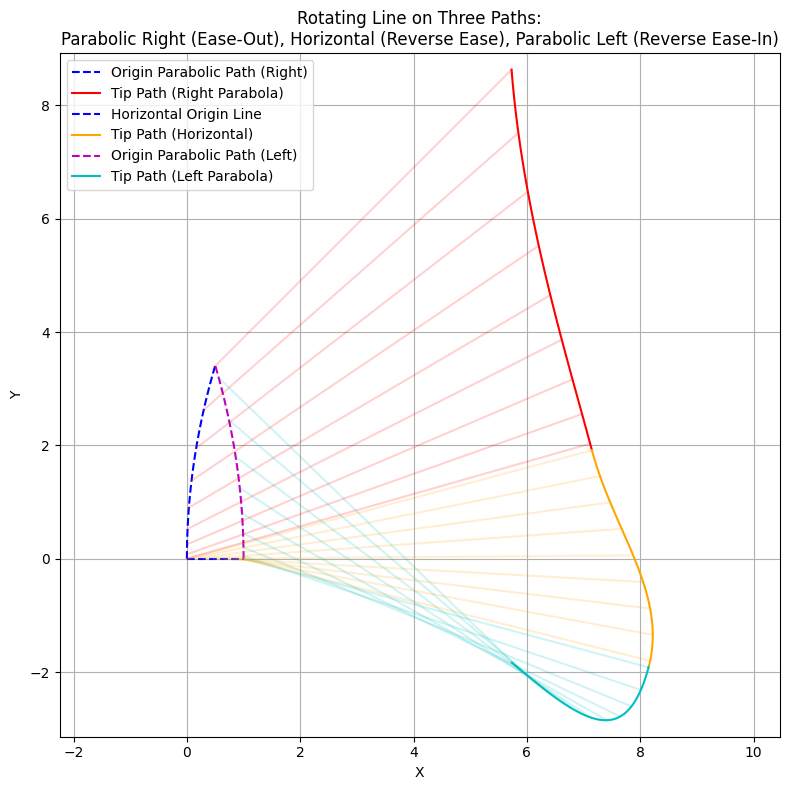

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
length = 7.4
n_steps = 100
a = 0.043  # Parabola strength (original: right curve upward)
horizontal_length = 1.0

progress = np.linspace(0, 1, n_steps)

# 1. Original Parabolic path (upward right, 45° -> 15°)
def ease_out_quad(t):
    return 1 - (1 - t) ** 2

eased_parab = ease_out_quad(progress)
origin_ys = np.interp(eased_parab, [0, 1], [3.4, 0])
origin_xs = a * origin_ys ** 2

start_angle_parab = 45
end_angle_parab = 15
angle_degs_parab = np.linspace(start_angle_parab, end_angle_parab, n_steps)
angle_rads_parab = np.deg2rad(angle_degs_parab)
tip_xs_parab = origin_xs + length * np.cos(angle_rads_parab)
tip_ys_parab = origin_ys + length * np.sin(angle_rads_parab)

# 2. Horizontal path (reversed ease-in-out, 15° -> -15°)
def ease_in_out_custom(t):
    return 0.5*(1 - np.cos(np.pi * t))

def reverse_ease(t):
    return ease_in_out_custom(1 - t)

eased_hor = reverse_ease(progress)
origin_base_x = 0
origin_base_y = 0
moving_origin_xs = np.interp(eased_hor, [0, 1], [origin_base_x + horizontal_length, origin_base_x])
moving_origin_ys = np.full_like(moving_origin_xs, origin_base_y)

start_angle_hor = 15
end_angle_hor = -15
angle_degs_hor = np.linspace(start_angle_hor, end_angle_hor, n_steps)
angle_rads_hor = np.deg2rad(angle_degs_hor)
tip_xs_hor = moving_origin_xs + length * np.cos(angle_rads_hor)
tip_ys_hor = moving_origin_ys + length * np.sin(angle_rads_hor)

# ------ 3. NEW: Parabolic Left-Curving Path from [1, 0] ------#
# Use a negative quadratic for left-curve, e.g. x = 1 - b*y^2

b = 0.043    # Similar curvature as "a" above
start_x = 1.0
start_y = 0.0
max_y = 3.4  # How far up the new path goes

# Control speed along the path: reversed ease-in (slow at first, fast at end)
def ease_in_quad(t):
    return  (t**2)

eased_parab_left = ease_in_quad(progress)  # Reversed ease-in: slow start

# y runs from 0 to max_y along eased profile
origin_ys_left = np.interp(eased_parab_left, [0, 1], [start_y, max_y])
origin_xs_left = start_x - b * origin_ys_left**2  # Left curve

start_angle_left = -15
end_angle_left = -45
angle_degs_left = np.linspace(start_angle_left, end_angle_left, n_steps)
angle_rads_left = np.deg2rad(angle_degs_left)

tip_xs_left = origin_xs_left + length * np.cos(angle_rads_left)
tip_ys_left = origin_ys_left + length * np.sin(angle_rads_left)

# ------ (Optional) Show speed profiles ------
plt.figure(figsize=(8,3))
plt.plot(progress, np.gradient(eased_parab), label='Parabolic (ease-out) speed')
plt.plot(progress, np.gradient(eased_hor), label='Horizontal (reverse ease) speed')
plt.plot(progress, np.gradient(eased_parab_left), label='Parabolic Left (reversed ease-in) speed')
plt.title('Instantaneous Origin Speed Profiles')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# ------ Plot all three paths and sweep lines -------
plt.figure(figsize=(8, 8))

# 1. Parabolic (right) original
plt.plot(origin_xs, origin_ys, 'b--', label='Origin Parabolic Path (Right)')
plt.plot(tip_xs_parab, tip_ys_parab, 'r-', label='Tip Path (Right Parabola)')

# 2. Horizontal
plt.plot([origin_base_x, origin_base_x + horizontal_length], [origin_base_y, origin_base_y], 'b--' , label='Horizontal Origin Line')
plt.plot(tip_xs_hor, tip_ys_hor, color='orange', label='Tip Path (Horizontal)')

# 3. Parabolic Left
plt.plot(origin_xs_left, origin_ys_left, 'm--', label='Origin Parabolic Path (Left)')
plt.plot(tip_xs_left, tip_ys_left, 'c-', label='Tip Path (Left Parabola)')


# Sample lines for all three paths
for i in range(0, n_steps, 12):
    # Right parabola
    ox, oy = origin_xs[i], origin_ys[i]
    tx, ty = tip_xs_parab[i], tip_ys_parab[i]
    plt.plot([ox, tx], [oy, ty], 'r-', alpha=0.18)
    # Horizontal
    ox, oy = moving_origin_xs[i], moving_origin_ys[i]
    tx, ty = tip_xs_hor[i], tip_ys_hor[i]
    plt.plot([ox, tx], [oy, ty], color='orange', alpha=0.18)
    # Left parabola
    ox, oy = origin_xs_left[i], origin_ys_left[i]
    tx, ty = tip_xs_left[i], tip_ys_left[i]
    plt.plot([ox, tx], [oy, ty], 'c-', alpha=0.18)


plt.title("Rotating Line on Three Paths:\nParabolic Right (Ease-Out), Horizontal (Reverse Ease), Parabolic Left (Reverse Ease-In)")
plt.xlabel("X")
plt.ylabel("Y")
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


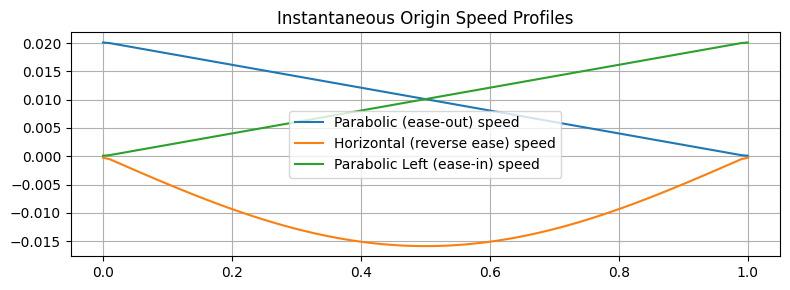

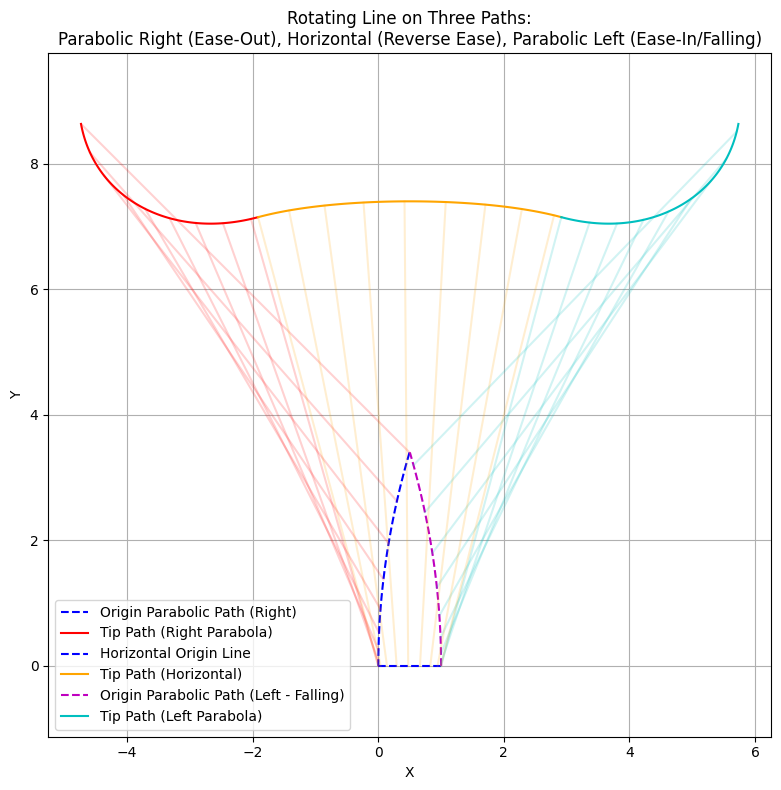

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# ========= PARAMETERS ===========
length = 7.4
n_steps = 100
a = 0.043      # Parabola strength (right/up path)
b = 0.043      # Parabola strength (left/falling path)
horizontal_length = 1.0

# --- All angles, for easy editing ---
start_angle_parab = 135    # Parabolic right (start)
end_angle_parab = 105     # Parabolic right (end)

start_angle_hor = 105      # Horizontal path (start)
end_angle_hor = 75       # Horizontal path (end)

start_angle_left = 75    # Parabolic left (start)
end_angle_left = 45      # Parabolic left (end)

# --- Path params you may want to adjust ---
origin_y0_parab = 3.4     # Start y for parabola right
origin_y1_parab = 0.0     # End y for parabola right
parab_left_x0 = 1.0       # Start X for left parabola
parab_left_y0 = 0.0       # Start Y for left parabola
parab_left_y1 = 3.4      # How far "down" the left parabola falls

# ========= END OF TOP-LEVEL PARAMS ==========

progress = np.linspace(0, 1, n_steps)

# 1. Parabolic Right/Up, ease-out
def ease_out_quad(t):
    return 1 - (1 - t) ** 2

eased_parab = ease_out_quad(progress)
origin_ys = np.interp(eased_parab, [0, 1], [origin_y0_parab, origin_y1_parab])
origin_xs = a * origin_ys ** 2

angle_degs_parab = np.linspace(start_angle_parab, end_angle_parab, n_steps)
angle_rads_parab = np.deg2rad(angle_degs_parab)
tip_xs_parab = origin_xs + length * np.cos(angle_rads_parab)
tip_ys_parab = origin_ys + length * np.sin(angle_rads_parab)

# 2. Horizontal path
def ease_in_out_custom(t):
    return 0.5*(1 - np.cos(np.pi * t))
def reverse_ease(t):
    return ease_in_out_custom(1 - t)

eased_hor = reverse_ease(progress)
origin_base_x = 0
origin_base_y = 0
moving_origin_xs = np.interp(eased_hor, [0, 1], [origin_base_x + horizontal_length, origin_base_x])
moving_origin_ys = np.full_like(moving_origin_xs, origin_base_y)

angle_degs_hor = np.linspace(start_angle_hor, end_angle_hor, n_steps)
angle_rads_hor = np.deg2rad(angle_degs_hor)
tip_xs_hor = moving_origin_xs + length * np.cos(angle_rads_hor)
tip_ys_hor = moving_origin_ys + length * np.sin(angle_rads_hor)

# 3. Parabolic Left/Falling path, ease-in
def ease_in_quad(t):
    return t**2

eased_parab_left = ease_in_quad(progress)  # slow at first, speeds up

origin_ys_left = np.interp(eased_parab_left, [0, 1], [parab_left_y0, parab_left_y1])
origin_xs_left = parab_left_x0 - b * origin_ys_left**2  # Left parabola, falling

angle_degs_left = np.linspace(start_angle_left, end_angle_left, n_steps)
angle_rads_left = np.deg2rad(angle_degs_left)
tip_xs_left = origin_xs_left + length * np.cos(angle_rads_left)
tip_ys_left = origin_ys_left + length * np.sin(angle_rads_left)

# ------ (Optional) Show speed profiles ------
plt.figure(figsize=(8,3))
plt.plot(progress, np.gradient(eased_parab), label='Parabolic (ease-out) speed')
plt.plot(progress, np.gradient(eased_hor), label='Horizontal (reverse ease) speed')
plt.plot(progress, np.gradient(eased_parab_left), label='Parabolic Left (ease-in) speed')
plt.title('Instantaneous Origin Speed Profiles')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


# ------ Plot all three paths and sweep lines -------
plt.figure(figsize=(8, 8))

# 1. Parabolic right
plt.plot(origin_xs, origin_ys, 'b--', label='Origin Parabolic Path (Right)')
plt.plot(tip_xs_parab, tip_ys_parab, 'r-', label='Tip Path (Right Parabola)')

# 2. Horizontal
plt.plot([origin_base_x, origin_base_x + horizontal_length], [origin_base_y, origin_base_y], 'b--', label='Horizontal Origin Line')
plt.plot(tip_xs_hor, tip_ys_hor, color='orange', label='Tip Path (Horizontal)')

# 3. Parabolic left (falling)
plt.plot(origin_xs_left, origin_ys_left, 'm--', label='Origin Parabolic Path (Left - Falling)')
plt.plot(tip_xs_left, tip_ys_left, 'c-', label='Tip Path (Left Parabola)')

# Sample sweep lines (uncomment if needed)
for i in range(0, n_steps, 12):
   plt.plot([origin_xs[i], tip_xs_parab[i]], [origin_ys[i], tip_ys_parab[i]], 'r-', alpha=0.18)         # Parabolic right
   plt.plot([moving_origin_xs[i], tip_xs_hor[i]], [moving_origin_ys[i], tip_ys_hor[i]], color='orange', alpha=0.18) # Horizontal
   plt.plot([origin_xs_left[i], tip_xs_left[i]], [origin_ys_left[i], tip_ys_left[i]], 'c-', alpha=0.18) # Parabolic left

plt.title("Rotating Line on Three Paths:\nParabolic Right (Ease-Out), Horizontal (Reverse Ease), Parabolic Left (Ease-In/Falling)")
plt.xlabel("X")
plt.ylabel("Y")
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

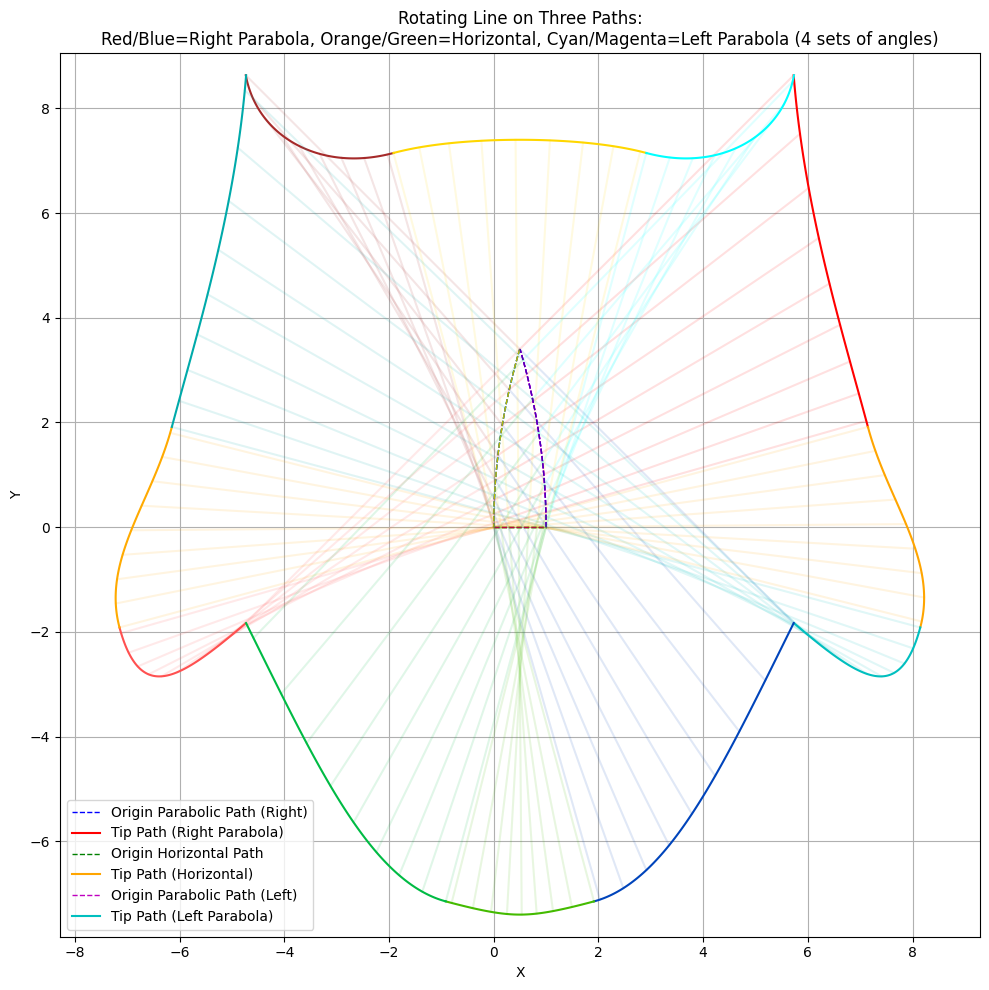

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ===== List of angle sets for the four runs =====
angle_sets = [
    dict(
        start_angle_parab=45,   end_angle_parab=15,
        start_angle_hor=15,     end_angle_hor=-15,
        start_angle_left=-15,   end_angle_left=-45
    ),
    dict(
        start_angle_parab=135,  end_angle_parab=105,
        start_angle_hor=105,    end_angle_hor=75,
        start_angle_left=75,    end_angle_left=45
    ),
    dict(
        start_angle_parab=225,  end_angle_parab=195,
        start_angle_hor=195,    end_angle_hor=165,
        start_angle_left=165,   end_angle_left=135
    ),
    dict(
        start_angle_parab=315,  end_angle_parab=285,
        start_angle_hor=285,    end_angle_hor=255,
        start_angle_left=255,   end_angle_left=225
    ),
]

# ==== Other parameters ====
length = 7.4
n_steps = 100
a = 0.043      # Parabola strength (right/up path)
b = 0.043      # Parabola strength (left/falling path)
horizontal_length = 1.0

origin_y0_parab = 3.4     # Start y for parabola right
origin_y1_parab = 0.0     # End y for parabola right
parab_left_x0 = 1.0       # Start X for left parabola
parab_left_y0 = 0.0       # Start Y for left parabola
parab_left_y1 = 3.4      # How far "down" the left parabola falls

progress = np.linspace(0, 1, n_steps)

def ease_out_quad(t): return 1 - (1 - t) ** 2
def ease_in_out_custom(t): return 0.5 * (1 - np.cos(np.pi * t))
def reverse_ease(t): return ease_in_out_custom(1 - t)
def ease_in_quad(t): return t ** 2

# ==== Plotting ====
fig, ax = plt.subplots(figsize=(10, 10))

colors = [
    ('b', 'r', 'g', 'orange', 'm', 'c'), # first cycle: blue, red, green, orange, magenta, cyan
    ('lime', 'brown', 'olive', 'gold', 'magenta', 'cyan'), # will repeat if needed
    ('#5050ff', '#ff5050', '#50ff50', '#ffaa00', '#aa00aa', '#00aaaa'),
    ('#bbbb00', '#0044bb', '#bb0044', '#44bb00', '#4400bb', '#00bb44'),
]
labels_done = set()

for i, angs in enumerate(angle_sets):
    # 1. Parabolic right (up)
    eased_parab = ease_out_quad(progress)
    origin_ys = np.interp(eased_parab, [0, 1], [origin_y0_parab, origin_y1_parab])
    origin_xs = a * origin_ys ** 2
    angle_degs_parab = np.linspace(angs['start_angle_parab'], angs['end_angle_parab'], n_steps)
    angle_rads_parab = np.deg2rad(angle_degs_parab)
    tip_xs_parab = origin_xs + length * np.cos(angle_rads_parab)
    tip_ys_parab = origin_ys + length * np.sin(angle_rads_parab)

    # 2. Horizontal path
    eased_hor = reverse_ease(progress)
    origin_base_x = 0
    origin_base_y = 0
    moving_origin_xs = np.interp(eased_hor, [0, 1], [origin_base_x + horizontal_length, origin_base_x])
    moving_origin_ys = np.full_like(moving_origin_xs, origin_base_y)
    angle_degs_hor = np.linspace(angs['start_angle_hor'], angs['end_angle_hor'], n_steps)
    angle_rads_hor = np.deg2rad(angle_degs_hor)
    tip_xs_hor = moving_origin_xs + length * np.cos(angle_rads_hor)
    tip_ys_hor = moving_origin_ys + length * np.sin(angle_rads_hor)

    # 3. Parabolic left (falling)
    eased_parab_left = ease_in_quad(progress)
    origin_ys_left = np.interp(eased_parab_left, [0, 1], [parab_left_y0, parab_left_y1])
    origin_xs_left = parab_left_x0 - b * origin_ys_left**2
    angle_degs_left = np.linspace(angs['start_angle_left'], angs['end_angle_left'], n_steps)
    angle_rads_left = np.deg2rad(angle_degs_left)
    tip_xs_left = origin_xs_left + length * np.cos(angle_rads_left)
    tip_ys_left = origin_ys_left + length * np.sin(angle_rads_left)

    # Colors for this run:
    color_origin_parab = colors[i][0]
    color_tip_parab    = colors[i][1]
    color_origin_hor   = colors[i][2]
    color_tip_hor      = colors[i][3]
    color_origin_left  = colors[i][4]
    color_tip_left     = colors[i][5]

    # Only plot legend label for first cycle
    l1 = "Origin Parabolic Path (Right)" if (i == 0) else None
    l2 = "Tip Path (Right Parabola)" if (i == 0) else None
    l3 = "Origin Horizontal Path" if (i == 0) else None
    l4 = "Tip Path (Horizontal)" if (i == 0) else None
    l5 = "Origin Parabolic Path (Left)" if (i == 0) else None
    l6 = "Tip Path (Left Parabola)" if (i == 0) else None

    # Plot curves
    ax.plot(origin_xs, origin_ys, '--', color=color_origin_parab, lw=1, label=l1)
    ax.plot(tip_xs_parab, tip_ys_parab, '-', color=color_tip_parab, lw=1.5, label=l2)
    ax.plot(moving_origin_xs, moving_origin_ys, '--', color=color_origin_hor, lw=1, label=l3)
    ax.plot(tip_xs_hor, tip_ys_hor, '-', color=color_tip_hor, lw=1.5, label=l4)
    ax.plot(origin_xs_left, origin_ys_left, '--', color=color_origin_left, lw=1, label=l5)
    ax.plot(tip_xs_left, tip_ys_left, '-', color=color_tip_left, lw=1.5, label=l6)


ax.set_title("Rotating Line on Three Paths:\nRed/Blue=Right Parabola, Orange/Green=Horizontal, Cyan/Magenta=Left Parabola (4 sets of angles)")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.axis('equal')
ax.grid(True)
ax.legend()
fig.tight_layout()
plt.show()

In [2]:
pip install ezdxf


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 72.3 MB/s eta 0:00:00


In [3]:
import numpy as np
import ezdxf

# ===== List of angle sets for the four runs =====
angle_sets = [
    dict(
        start_angle_parab=45,   end_angle_parab=15,
        start_angle_hor=15,     end_angle_hor=-15,
        start_angle_left=-15,   end_angle_left=-45
    ),
    dict(
        start_angle_parab=135,  end_angle_parab=105,
        start_angle_hor=105,    end_angle_hor=75,
        start_angle_left=75,    end_angle_left=45
    ),
    dict(
        start_angle_parab=225,  end_angle_parab=195,
        start_angle_hor=195,    end_angle_hor=165,
        start_angle_left=165,   end_angle_left=135
    ),
    dict(
        start_angle_parab=315,  end_angle_parab=285,
        start_angle_hor=285,    end_angle_hor=255,
        start_angle_left=255,   end_angle_left=225
    ),
]

# ==== Parameters ====
length = 7.4
n_steps = 100
a = 0.043      # Parabola strength (right/up path)
b = 0.043      # Parabola strength (left/falling path)
horizontal_length = 1.0

origin_y0_parab = 3.4     # Start y for parabola right
origin_y1_parab = 0.0     # End y for parabola right
parab_left_x0 = 1.0       # Start X for left parabola
parab_left_y0 = 0.0       # Start Y for left parabola
parab_left_y1 = 3.4       # How far "down" the left parabola falls

progress = np.linspace(0, 1, n_steps)

def ease_out_quad(t): return 1 - (1 - t) ** 2
def ease_in_out_custom(t): return 0.5 * (1 - np.cos(np.pi * t))
def reverse_ease(t): return ease_in_out_custom(1 - t)
def ease_in_quad(t): return t ** 2

# ==== Collect all tip points in order ====
all_points = []

for angs in angle_sets:
    # 1. Parabolic right (up) TIP path
    eased_parab = ease_out_quad(progress)
    origin_ys = np.interp(eased_parab, [0, 1], [origin_y0_parab, origin_y1_parab])
    origin_xs = a * origin_ys ** 2
    angle_degs_parab = np.linspace(angs['start_angle_parab'], angs['end_angle_parab'], n_steps)
    angle_rads_parab = np.deg2rad(angle_degs_parab)
    tip_xs_parab = origin_xs + length * np.cos(angle_rads_parab)
    tip_ys_parab = origin_ys + length * np.sin(angle_rads_parab)

    all_points.extend(list(zip(tip_xs_parab, tip_ys_parab)))

    # 2. Horizontal TIP path
    eased_hor = reverse_ease(progress)
    origin_base_x = 0
    origin_base_y = 0
    moving_origin_xs = np.interp(eased_hor, [0, 1], [origin_base_x + horizontal_length, origin_base_x])
    moving_origin_ys = np.full_like(moving_origin_xs, origin_base_y)
    angle_degs_hor = np.linspace(angs['start_angle_hor'], angs['end_angle_hor'], n_steps)
    angle_rads_hor = np.deg2rad(angle_degs_hor)
    tip_xs_hor = moving_origin_xs + length * np.cos(angle_rads_hor)
    tip_ys_hor = moving_origin_ys + length * np.sin(angle_rads_hor)

    all_points.extend(list(zip(tip_xs_hor, tip_ys_hor)))

    # 3. Parabolic left (down) TIP path
    eased_parab_left = ease_in_quad(progress)
    origin_ys_left = np.interp(eased_parab_left, [0, 1], [parab_left_y0, parab_left_y1])
    origin_xs_left = parab_left_x0 - b * origin_ys_left ** 2
    angle_degs_left = np.linspace(angs['start_angle_left'], angs['end_angle_left'], n_steps)
    angle_rads_left = np.deg2rad(angle_degs_left)
    tip_xs_left = origin_xs_left + length * np.cos(angle_rads_left)
    tip_ys_left = origin_ys_left + length * np.sin(angle_rads_left)

    all_points.extend(list(zip(tip_xs_left, tip_ys_left)))

# ==== Create and Export DXF ====
doc = ezdxf.new(dxfversion='R2010')
msp = doc.modelspace()

# Create a 2D POLYLINE from all tip points (Z=0)
msp.add_lwpolyline([(x, y) for x, y in all_points])

doc.saveas("traced_endpoints.dxf")
print("DXF file 'traced_endpoints.dxf' has been saved.")

DXF file 'traced_endpoints.dxf' has been saved.


In [4]:
import numpy as np
import ezdxf

angle_sets = [
    dict(
        start_angle_parab=45,   end_angle_parab=15,
        start_angle_hor=15,     end_angle_hor=-15,
        start_angle_left=-15,   end_angle_left=-45
    ),
    dict(
        start_angle_parab=135,  end_angle_parab=105,
        start_angle_hor=105,    end_angle_hor=75,
        start_angle_left=75,    end_angle_left=45
    ),
    dict(
        start_angle_parab=225,  end_angle_parab=195,
        start_angle_hor=195,    end_angle_hor=165,
        start_angle_left=165,   end_angle_left=135
    ),
    dict(
        start_angle_parab=315,  end_angle_parab=285,
        start_angle_hor=285,    end_angle_hor=255,
        start_angle_left=255,   end_angle_left=225
    ),
]

length = 7.4
n_steps = 100
a = 0.043
b = 0.043
horizontal_length = 1.0

origin_y0_parab = 3.4
origin_y1_parab = 0.0
parab_left_x0 = 1.0
parab_left_y0 = 0.0
parab_left_y1 = 3.4

progress = np.linspace(0, 1, n_steps)

def ease_out_quad(t): return 1 - (1 - t) ** 2
def ease_in_out_custom(t): return 0.5 * (1 - np.cos(np.pi * t))
def reverse_ease(t): return ease_in_out_custom(1 - t)
def ease_in_quad(t): return t ** 2

# ==== DXF Export ====
doc = ezdxf.new(dxfversion='R2010')
msp = doc.modelspace()

for angs in angle_sets:
    petal_points = []

    # 1. Parabolic right (up) tip path
    eased_parab = ease_out_quad(progress)
    origin_ys = np.interp(eased_parab, [0, 1], [origin_y0_parab, origin_y1_parab])
    origin_xs = a * origin_ys ** 2
    angle_degs_parab = np.linspace(angs['start_angle_parab'], angs['end_angle_parab'], n_steps)
    angle_rads_parab = np.deg2rad(angle_degs_parab)
    tip_xs_parab = origin_xs + length * np.cos(angle_rads_parab)
    tip_ys_parab = origin_ys + length * np.sin(angle_rads_parab)
    petal_points.extend(list(zip(tip_xs_parab, tip_ys_parab)))

    # 2. Horizontal tip path
    eased_hor = reverse_ease(progress)
    origin_base_x = 0
    origin_base_y = 0
    moving_origin_xs = np.interp(eased_hor, [0, 1], [origin_base_x + horizontal_length, origin_base_x])
    moving_origin_ys = np.full_like(moving_origin_xs, origin_base_y)
    angle_degs_hor = np.linspace(angs['start_angle_hor'], angs['end_angle_hor'], n_steps)
    angle_rads_hor = np.deg2rad(angle_degs_hor)
    tip_xs_hor = moving_origin_xs + length * np.cos(angle_rads_hor)
    tip_ys_hor = moving_origin_ys + length * np.sin(angle_rads_hor)
    petal_points.extend(list(zip(tip_xs_hor, tip_ys_hor)))

    # 3. Parabolic left (down) tip path
    eased_parab_left = ease_in_quad(progress)
    origin_ys_left = np.interp(eased_parab_left, [0, 1], [parab_left_y0, parab_left_y1])
    origin_xs_left = parab_left_x0 - b * origin_ys_left ** 2
    angle_degs_left = np.linspace(angs['start_angle_left'], angs['end_angle_left'], n_steps)
    angle_rads_left = np.deg2rad(angle_degs_left)
    tip_xs_left = origin_xs_left + length * np.cos(angle_rads_left)
    tip_ys_left = origin_ys_left + length * np.sin(angle_rads_left)
    petal_points.extend(list(zip(tip_xs_left, tip_ys_left)))

    # Add as individual polyline, so no astray lines are created between petals
    msp.add_lwpolyline(petal_points)

doc.saveas("traced_endpoints_fixed.dxf")
print("DXF file 'traced_endpoints_fixed.dxf' has been saved.")

DXF file 'traced_endpoints_fixed.dxf' has been saved.
